In [52]:
import sys, subprocess, os
from io import StringIO
import pandas as pd
VERBOSE = True
def mdb_to_pandas(database_path):
    subprocess.call(["mdb-schema", database_path, "mysql"])
    # Get the list of table names with "mdb-tables"
    table_names = subprocess.Popen(["mdb-tables", "-1", database_path],
                                   stdout=subprocess.PIPE).communicate()[0]
    tables = table_names.splitlines()
    sys.stdout.flush()
    # Dump each table as a stringio using "mdb-export",
    out_tables = {}
    for rtable in tables:
        table = rtable.decode()
        if VERBOSE: print('running table:',table)
        if table != '':
            if VERBOSE: print("Dumping " + table)
            contents = subprocess.Popen(["mdb-export", database_path, table],
                                        stdout=subprocess.PIPE).communicate()[0]
            temp_io = StringIO(contents.decode())
            print(table, temp_io)
            out_tables[table] = pd.read_csv(temp_io)
    return out_tables
tables = mdb_to_pandas('NPPSD_Back_v2.mdb')

running table: NPPSDv2_Masterkey_Crosswalk_3_19_14
Dumping NPPSDv2_Masterkey_Crosswalk_3_19_14
NPPSDv2_Masterkey_Crosswalk_3_19_14 <_io.StringIO object at 0x1b4910dc8>
running table: tbl_DATA_OBS
Dumping tbl_DATA_OBS
tbl_DATA_OBS <_io.StringIO object at 0x1cc6170d8>
running table: tbl_LOCATION
Dumping tbl_LOCATION
tbl_LOCATION <_io.StringIO object at 0x1cc617318>


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2901: DtypeWarning: Columns (2,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


running table: tbl_LU_All_Sp
Dumping tbl_LU_All_Sp
tbl_LU_All_Sp <_io.StringIO object at 0x1b682fa68>
running table: tbl_LU_Data_Source
Dumping tbl_LU_Data_Source
tbl_LU_Data_Source <_io.StringIO object at 0x1cc617318>
running table: tbl_LU_Modified_to_Simple_Bird_Behavior
Dumping tbl_LU_Modified_to_Simple_Bird_Behavior
tbl_LU_Modified_to_Simple_Bird_Behavior <_io.StringIO object at 0x1d1d5d1f8>
running table: tbl_LU_Month
Dumping tbl_LU_Month
tbl_LU_Month <_io.StringIO object at 0x1cc617318>
running table: tbl_LU_Platform
Dumping tbl_LU_Platform
tbl_LU_Platform <_io.StringIO object at 0x1b682faf8>
running table: tbl_LU_Selected_Birds
Dumping tbl_LU_Selected_Birds
tbl_LU_Selected_Birds <_io.StringIO object at 0x1cc617318>
running table: tbl_LU_Simple_Behavior
Dumping tbl_LU_Simple_Behavior
tbl_LU_Simple_Behavior <_io.StringIO object at 0x1cc6170d8>
running table: tbl_LU_Survey_Type
Dumping tbl_LU_Survey_Type
tbl_LU_Survey_Type <_io.StringIO object at 0x1b682faf8>
running table: tbl_LU_

In [93]:
data = tables['tbl_DATA_OBS']
bird_data = data.loc[data['Common Name'].isin(['Northern Fulmar','Black-legged Kittiwake','Common Murre'])].sample(n=2000)

In [245]:
pd.set_option('display.max_columns', 500)
spotting_data = tables['tbl_LOCATION'].sample(n=10000).reset_index()

In [246]:
spotting_data

,index,Master Key,Survey ID,Station Number,Survey Target,Modified Platform Type,Modified Survey Type,Fly-Bird-Method,Loc Method,Lat,Lon,Year,Month,Day,Julian Date,Hour,Minutes,Elapsed Time,Transect Width,Speed,Depth,Surface Temperature,Surface Salinity,Barometric Pressure,Barometric Trend,Wind Speed,Sea State,Weather,Sample Area,Source,PI Credit
0,198010,CPR20050602S633,35712,16,All,Large Boat,Pelagic Survey,Continuous,Centroid,54.398868,-165.847235,2005,6,2,153,NaN,NaN,NaN,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.196139,Kathleen Moore (Canadian Wildlife Service),Ken Morgan
1,11249,1431985-07-26 19:48:24,/home/martin/Documents/SMMOCI-MR,0,All,Large Boat,Pelagic Survey,Continuous,Centroid,64.972568,-168.915478,1985,7,26,207,19.0,48.0,15.0,300.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.898637,Martin Renner,George L. Hunt
2,134149,CAC19951025F4237,CAC1995_10,206,All,Large Boat,Pelagic Survey,Continuous,Centroid,33.239821,-124.217063,1995,10,25,298,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.450000,PRBO Marine Director,Bill Sydeman
3,136356,CAC19961014F6514,CAC1996_10,305,All,Large Boat,Pelagic Survey,Continuous,Centroid,30.288793,-122.682546,1996,10,14,288,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.450000,PRBO Marine Director,Bill Sydeman
4,107627,CAC19890423F8900,CAC1989_04,367,All,Large Boat,Pelagic Survey,Continuous,Centroid,33.560761,-119.168007,1989,4,23,113,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.450000,Bill Sydeman,PRBO Marine Director
5,154008,CAC20010121F839,CAC2001_01,60,All,Large Boat,Pelagic Survey,Continuous,Centroid,33.614270,-123.859896,2001,1,21,21,NaN,NaN,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.450000,PRBO Marine Director,Bill Sydeman
6,201860,CPR20060707F26,51933,1,All,Large Boat,Pelagic Survey,Continuous,Centroid,48.652950,-123.238244,2006,7,7,188,6.0,58.0,NaN,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.598506,Kathleen Moore (Canadian Wildlife Service),Ken Morgan
7,10214,132006-08-15 11:00:04,dLogData/atSea_noscan/FIT_2006/F,5668404,All,Large Boat,Pelagic Survey,Continuous,Centroid,56.894169,-151.865501,2006,8,15,227,11.0,0.0,9.0,100.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.299957,Martin Renner,Kathy Kuletz
8,312841,SMMOCI1996-06-29 16:00:00,SMMOCI-data/NMFSbirddata95-97/NM,0,All,Large Boat,Pelagic Survey,Snapshot,Centroid,54.366667,-164.783333,1996,6,29,181,16.0,0.0,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.647410,Martin Renner,John F. Piatt
9,79046,862010-08-31 03:12:32,dLogData/2010/Wecoma_2010.csv,3253152,All,Large Boat,Pelagic Survey,Snapshot,Centroid,62.101833,-170.238594,2010,8,31,243,3.0,12.0,8.0,300.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.887566,Martin Renner,Kathy Kuletz


In [266]:
from sklearn import preprocessing
### Standardize Numerical Data
#list of columns to standardize with 0 as null values

spotting_data['Lat'].fillna((spotting_data['Lat'].mean()), inplace=True)
spotting_data['Lon'].fillna((spotting_data['Lon'].mean()), inplace=True)
spotting_data['Surface Temperature'].fillna((spotting_data['Surface Temperature'].mean()), inplace=True)
spotting_data['Sample Area'].fillna((spotting_data['Sample Area'].mean()), inplace=True)

X = spotting_data[['Lat', 
                       'Lon',
                       ]].values

X

array([[  54.39886828, -165.84723465],
       [  64.97256754, -168.91547812],
       [  33.23982083, -124.21706335],
       ...,
       [  31.18386835, -120.82718744],
       [  32.45411578, -121.46949515],
       [  59.13888889, -171.86944444]])

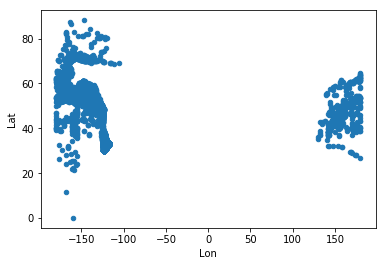

In [261]:
spotting_data.plot.scatter(x='Lon', y='Lat')

In [280]:
from sklearn.cluster import DBSCAN
scanner = DBSCAN(eps=5,min_samples=10)
# plot points as red dots
spotting_data['labels'] = scanner.fit_predict(X)
spotting_data

,index,Master Key,Survey ID,Station Number,Survey Target,Modified Platform Type,Modified Survey Type,Fly-Bird-Method,Loc Method,Lat,Lon,Year,Month,Day,Julian Date,Hour,Minutes,Elapsed Time,Transect Width,Speed,Depth,Surface Temperature,Surface Salinity,Barometric Pressure,Barometric Trend,Wind Speed,Sea State,Weather,Sample Area,Source,PI Credit,labels
0,198010,CPR20050602S633,35712,16,All,Large Boat,Pelagic Survey,Continuous,Centroid,54.398868,-165.847235,2005,6,2,153,NaN,NaN,NaN,400.0,NaN,NaN,8.523361,NaN,NaN,NaN,NaN,NaN,NaN,0.196139,Kathleen Moore (Canadian Wildlife Service),Ken Morgan,0
1,11249,1431985-07-26 19:48:24,/home/martin/Documents/SMMOCI-MR,0,All,Large Boat,Pelagic Survey,Continuous,Centroid,64.972568,-168.915478,1985,7,26,207,19.0,48.0,15.0,300.0,12.0,NaN,8.523361,NaN,NaN,NaN,NaN,NaN,NaN,0.898637,Martin Renner,George L. Hunt,0
2,134149,CAC19951025F4237,CAC1995_10,206,All,Large Boat,Pelagic Survey,Continuous,Centroid,33.239821,-124.217063,1995,10,25,298,NaN,NaN,NaN,300.0,NaN,NaN,8.523361,NaN,NaN,NaN,NaN,NaN,NaN,0.450000,PRBO Marine Director,Bill Sydeman,0
3,136356,CAC19961014F6514,CAC1996_10,305,All,Large Boat,Pelagic Survey,Continuous,Centroid,30.288793,-122.682546,1996,10,14,288,NaN,NaN,NaN,300.0,NaN,NaN,8.523361,NaN,NaN,NaN,NaN,NaN,NaN,0.450000,PRBO Marine Director,Bill Sydeman,0
4,107627,CAC19890423F8900,CAC1989_04,367,All,Large Boat,Pelagic Survey,Continuous,Centroid,33.560761,-119.168007,1989,4,23,113,NaN,NaN,NaN,300.0,NaN,NaN,8.523361,NaN,NaN,NaN,NaN,NaN,NaN,0.450000,Bill Sydeman,PRBO Marine Director,0
5,154008,CAC20010121F839,CAC2001_01,60,All,Large Boat,Pelagic Survey,Continuous,Centroid,33.614270,-123.859896,2001,1,21,21,NaN,NaN,NaN,300.0,NaN,NaN,8.523361,NaN,NaN,NaN,NaN,NaN,NaN,0.450000,PRBO Marine Director,Bill Sydeman,0
6,201860,CPR20060707F26,51933,1,All,Large Boat,Pelagic Survey,Continuous,Centroid,48.652950,-123.238244,2006,7,7,188,6.0,58.0,NaN,400.0,NaN,NaN,8.523361,NaN,NaN,NaN,NaN,NaN,NaN,0.598506,Kathleen Moore (Canadian Wildlife Service),Ken Morgan,0
7,10214,132006-08-15 11:00:04,dLogData/atSea_noscan/FIT_2006/F,5668404,All,Large Boat,Pelagic Survey,Continuous,Centroid,56.894169,-151.865501,2006,8,15,227,11.0,0.0,9.0,100.0,21.0,NaN,8.523361,NaN,NaN,NaN,NaN,NaN,NaN,0.299957,Martin Renner,Kathy Kuletz,0
8,312841,SMMOCI1996-06-29 16:00:00,SMMOCI-data/NMFSbirddata95-97/NM,0,All,Large Boat,Pelagic Survey,Snapshot,Centroid,54.366667,-164.783333,1996,6,29,181,16.0,0.0,NaN,300.0,NaN,NaN,8.523361,NaN,NaN,NaN,NaN,NaN,NaN,0.647410,Martin Renner,John F. Piatt,0
9,79046,862010-08-31 03:12:32,dLogData/2010/Wecoma_2010.csv,3253152,All,Large Boat,Pelagic Survey,Snapshot,Centroid,62.101833,-170.238594,2010,8,31,243,3.0,12.0,8.0,300.0,23.0,NaN,8.523361,NaN,NaN,NaN,NaN,NaN,NaN,0.887566,Martin Renner,Kathy Kuletz,0


In [291]:
labels = spotting_data['labels'].unique()
labelsets = []
for label in labels:
    labelsets.append(spotting_data[spotting_data['labels'] == label])

In [292]:
%pylab inline

spotting_data['labels'].value_counts()

Populating the interactive namespace from numpy and matplotlib


 0    9348
 1     570
-1      70
 2      12
Name: labels, dtype: int64

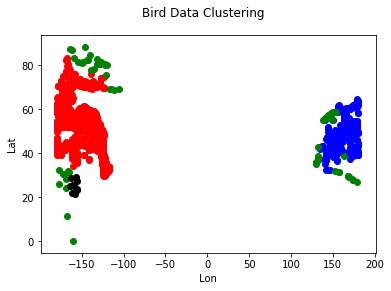

In [293]:
# create a figure and label it
fig = plt.figure()
fig.suptitle('Bird Data Clustering')

x_axis = 'Lon'
y_axis = 'Lat'

plt.xlabel(x_axis)
plt.ylabel(y_axis)

# put the input data on the graph, with different colors and shapes for each type
scatter_0 = plt.scatter(labelsets[0][x_axis], labelsets[0][y_axis],
                            c="red", marker="o", label='Group 1')
scatter_1 = plt.scatter(labelsets[1][x_axis], labelsets[1][y_axis],
                            c="blue", marker="o", label='Group 2')
scatter_2 = plt.scatter(labelsets[2][x_axis], labelsets[2][y_axis],
                            c="green", marker="o", label='Group 3')
scatter_3 = plt.scatter(labelsets[3][x_axis], labelsets[3][y_axis],
                            c="black", marker="o", label='Group 4')
# scatter_4 = plt.scatter(labelsets[4][x_axis], labelsets[4][y_axis],
#                             c="y", marker="o", label='Group 5')


# add a legend to explain which points are which


# show the graph
plt.show()